In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
#from scipy import stats

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#pd.set_option('display.max_rows', 20)

In [ ]:
!pip install openpyxl

In [ ]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [ ]:
#data = df.copy()

In [ ]:
df = data.copy()

In [ ]:
#data = df.copy()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data.describe(include = "all")

In [ ]:
data['adDescription'].head()

In [ ]:
data['adDealType'].value_counts()

In [ ]:
data['Deal_Type'] = data['adDealType'].copy()

In [ ]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [ ]:
data['Deal_Type'].head()

In [ ]:
data.columns

In [ ]:
len(data.columns)

In [ ]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

In [ ]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [ ]:
data.shape

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
#To find the percentage of missing rows in each column
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

## Treating Missing Values and Outliers

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [ ]:
data.corr()

In [ ]:
data['NumApartments'].head()

In [ ]:
data['NumApartments'].value_counts()

In [ ]:
mis_columns

In [ ]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [ ]:
data.columns

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

#sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
sns.boxplot(data['NumApartments'])
plt.show()

In [ ]:
sns.distplot(data['NumApartments'])
plt.show()

In [ ]:
data = data.drop(columns = mis_columns, axis = 1)

In [ ]:
data.columns

In [ ]:
data.isnull().sum().any()

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
data['City'].value_counts()

In [ ]:
City = data['City'].copy()

In [ ]:
data['City'].describe()

In [ ]:
data['City'].head()

In [ ]:
#Filling Null Values
data['City'].fillna('Zürich', inplace = True) #Fillna
#data['City'].ffill(axis = 0)  #ForwardFill

In [ ]:
data['City'].mode()

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

#### **Exploring the City copied from data['City']**

In [233]:
City.head()

,City
0,268126.74419
1,91808.18182
2,168237.07651
3,745554.41230
4,410524.25872


In [234]:
City = pd.DataFrame(data = City)
City.head()

,City
0,268126.74419
1,91808.18182
2,168237.07651
3,745554.41230
4,410524.25872


In [235]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451956 entries, 0 to 451955
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   City    451956 non-null  float64
dtypes: float64(1)
memory usage: 3.4 MB


In [ ]:
encoder=ce.TargetEncoder(cols='City')

In [ ]:
data['City'].head()

In [ ]:
data['City'].head(20)

In [ ]:
data['City'].describe()

In [ ]:
data.describe(include = 'all')

In [ ]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
#plt.show()

## Exploring the target Column

### PriceText

In [ ]:
PriceText = data['PriceText'].copy()
PriceText = pd.DataFrame(data = PriceText)
PriceText.head()

In [ ]:
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace(',','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].describe()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('On request',np.nan)
data['PriceText'].value_counts()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('EUR','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].apply(pd.to_numeric)

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].describe()

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sns.boxplot(data['PriceText'])

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

Since, PriceText contains outliers, drop the rows

In [ ]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [ ]:
data['PriceText'].describe()

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [ ]:
data["PriceText"].describe()

In [ ]:
sns.boxplot(data['PriceText'])

In [ ]:
plt.boxplot(data["PriceText"])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
sns.distplot(data['PriceText'])

**Encoding the categorical column [''City''] with the target column**

In [236]:
City.shape, data['PriceText'].shape, data['City'].shape

((451956, 1), (451956,), (451956,))

In [237]:
City = data['City'].copy()

In [238]:
City.shape, data['PriceText'].shape, data['City'].shape

((451956,), (451956,), (451956,))

In [241]:
#Fit and Transform Train Data
City = encoder.fit_transform(City,data['PriceText'])

In [240]:
City.head()

,City
0,268126.74419
1,91808.18182
2,168237.07651
3,745554.41230
4,410524.25872


In [ ]:
City = City.apply(pd.to_numeric)

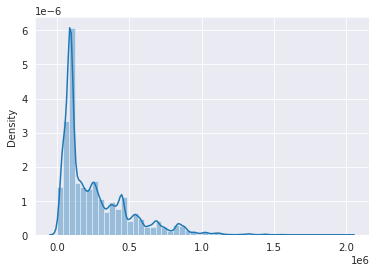

In [242]:
sns.distplot(City)
plt.show()

In [ ]:
#City.skew()

In [245]:
#City.dtype

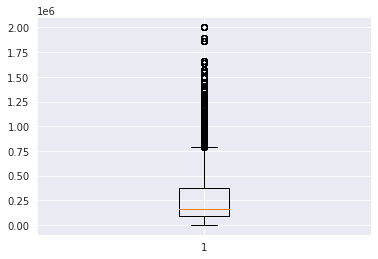

In [246]:
plt.boxplot(City)
plt.show()

In [296]:
data['City'] = City.copy()

In [ ]:
data.isnull().sum()

Dropping the description for now, Will work on it later

In [ ]:
Description = data['Description'].copy()

In [ ]:
data = data.drop('Description', axis = 1)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data.shape

In [293]:
data.columns

Index(['DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description',
       'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

### LangDetected

In [294]:
data['LangDetected'].value_counts()

de    225212
fr    139975
it     76627
en     10142
Name: LangDetected, dtype: int64

In [295]:
obj_col.append('LangDetected')

### Canton

In [ ]:
data['Canton'].head()

In [ ]:
data['Canton'].value_counts()

Run it at the later end because it will add to the number of columns and there is still plenty of work to do

In [ ]:
#data = pd.get_dummies(data = data['Canton'], drop_first = True)

In [ ]:
obj_col.append('Canton')

### ZipCode

In [ ]:
data.ZipCode.head()

In [ ]:
data.ZipCode.value_counts()

Is this column really relevant to the model????

In [292]:
data.columns

Index(['DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description',
       'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

## Date_Columns

In [ ]:
date_col = ['PublishedDate', 'AvailableDate']

In [ ]:
data[date_col].head()

In [ ]:
data['AvailableDate'].value_counts()

In [ ]:
data['AvailableDate'].head()

In [ ]:
#sofort = 'right away'
#nach Vereinbarung = by arrangement

In [ ]:
data['PublishedDate'].head()

In [ ]:
data.columns

In [ ]:
data['Description'] = Description.copy()

In [254]:
data[['PublishedDate', 'AvailableDate', 'DealType', 'PriceText', 'Description']].head()

,PublishedDate,AvailableDate,DealType,PriceText,Description
0,2020-12-16,not available,0,1050.00000,Appartement avec beaucoup de charme à louer à ...
1,2021-01-20,sofort,0,1061.00000,Für diese Wohnung suchen wir ein nettes Paar (...
2,2020-10-16,sofort,0,2250.00000,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
3,2020-07-17,sofort,1,2150000.00000,"Attico mansardato, posto in elegante palazzina..."
4,2020-05-06,sofort,0,880.00000,"Appartamento con pavimento in parquet, riscald..."


In [ ]:
data['PublishedDate'].head()

In [258]:
AvlDate = data['AvailableDate'].copy()
PubDate = data['PublishedDate'].copy()

In [ ]:
#AvlDate = pd.to_datetime(AvlDate)
AvlDate

In [259]:
AvlDate.value_counts()

nach Vereinbarung    171530
sofort                64422
By arrangement        48545
Immediately           14958
not available         13338
                      ...  
10.07.2023                1
07.07.2022                1
28.02.5492                1
01.09.2025                1
23.04.2022                1
Name: AvailableDate, Length: 669, dtype: int64

In [260]:
replacement_mapping_dict = {
    "nach Vereinbarung": np.nan,
    "sofort": np.nan,
    "By arrangement": np.nan,
    "Immediately": np.nan,
    "not available": np.nan
}
AvlDate = AvlDate.replace(replacement_mapping_dict)

In [261]:
AvlDate.value_counts()

01.04.2021    11677
01.07.2021    11214
01.10.2021    10494
01.08.2021     8121
01.05.2021     8009
              ...  
23.01.2021        1
01.07.2121        1
14.06.2022        1
01.05.2045        1
23.04.2022        1
Name: AvailableDate, Length: 664, dtype: int64

In [ ]:
len(data)

In [ ]:
(AvlDate.isnull().sum()/len(data))*100

In [ ]:
AvlDate.fillna("Others", inplace = True)

In [262]:
AvlDate.isnull().sum()

312793

In [ ]:
AvlDate = pd.to_datetime(AvlDate)

In [264]:
AvlDate.describe()

count         139163
unique           664
top       01.04.2021
freq           11677
Name: AvailableDate, dtype: object

In [265]:
percentage_missing(AvlDate)

69.20872828328422

In [267]:
AvlDate = pd.DataFrame(AvlDate)

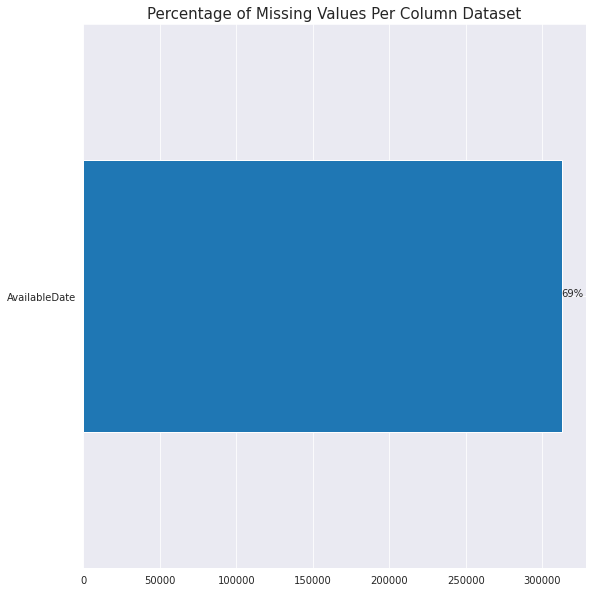

In [268]:
ax = AvlDate.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Maybe I will need to drop the avilable dates for now because of too much null value

### Pend Pend Pend Pend

### PublishedDate

In [280]:
data['PublishedDate'].head()

0    2020-12-16
1    2021-01-20
2    2020-10-16
3    2020-07-17
4    2020-05-06
Name: PublishedDate, dtype: object

In [281]:
data['PublishedDate'] = pd.to_datetime(data['PublishedDate'])

In [283]:
data['PublishedDate'].head()

0   2020-12-16
1   2021-01-20
2   2020-10-16
3   2020-07-17
4   2020-05-06
Name: PublishedDate, dtype: datetime64[ns]

In [284]:
#Extracting the year, month & day from the published datetime column

# Year
data['PublishedYear'] = data['PublishedDate'].dt.year

# Month
data['PublishedMonth'] = data['PublishedDate'].dt.month

# Day
data['PublishedDay'] = data['PublishedDate'].dt.day

## We Move to other columns again******

In [ ]:
data.columns

In [ ]:
NumRooms = data['NumRooms'].copy()

In [ ]:
data['NumRooms'].head()

In [ ]:
def percentage_missing(df):    
    pm = (df.isnull().sum()/len(data))*100
    return pm

In [ ]:
(data.NumRooms.isnull().sum()/len(data))*100

In [ ]:
data['NumRooms'].value_counts()

In [ ]:
data['NumRooms'] = data['NumRooms'].replace('None', np.nan)
data['NumRooms'].head()

In [ ]:
data['NumRooms'] = data['NumRooms'].apply(pd.to_numeric)

In [ ]:
data['NumRooms'].isnull().sum()

In [ ]:
percentage_missing(data['NumRooms'])

In [ ]:
data['NumRooms'].value_counts()

In [ ]:
data['NumRooms'].dtype

In [ ]:
sns.boxplot(data['NumRooms'])

In [ ]:
data['NumRooms'].describe()

In [ ]:
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['NumRooms'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
data = data[data["NumRooms"]<min(sample_outliers)].reset_index(drop = True)

In [ ]:
sns.boxplot(data['NumRooms'])
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
data['NumRooms'].describe()

In [ ]:
sns.distplot(data['NumRooms'])

In [ ]:
data['NumRooms'].isnull().sum()

In [ ]:
#data['NumRooms'].groupby()

In [ ]:
percentage_missing(data['NumRooms'])

In [291]:
data.columns

Index(['DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description',
       'PublishedYear', 'PublishedMonth', 'PublishedDay'],
      dtype='object')

### Floor Column

In [ ]:
data[['Floor', 'Floor1']].head()

In [ ]:
data = data.drop('Floor1', axis = 1)

In [ ]:
Floor = data['Floor'].copy()

In [ ]:
data['Floor'].value_counts()

In [ ]:
#To remove the digits from the floor column
data['Floor'] = data['Floor'].replace('\d+', '', regex = True)

In [ ]:
data['Floor'].value_counts()

* untergeschoss = basement 
* Stock oder höher = floor or higher

* This is the equivalent of this words in English

In [ ]:
# The replace fucntion to replace the words in german in the english format and correct the format of the incorrect value
replacement_mapping_dict = {
    ". Stock": 'Stock',
    ". floor ": 'Floor',
    "Untergeschoss": 'basement',
    ". Stock oder höher": 'floor or higher',
    "EG": 'ground floor'
}
data['Floor'] = data['Floor'].replace(replacement_mapping_dict)

In [286]:
data['Floor'].value_counts()

Stock              202254
not available      183951
ground floor        48024
Floor               15921
basement             1775
floor or higher        31
Name: Floor, dtype: int64

In [288]:
obj_col.append('Floor')

In [ ]:
data[['Floor', 'NumRooms']].head()

In [ ]:
data.columns

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns
* Get the number of years between the year of construction and the Available Year of the house & Year of Publishing the year for an ad

### Year of Construction

In [ ]:
Year = data['YearOfConstruction'].copy()

In [ ]:
data['YearOfConstruction'].head()

In [ ]:
data['YearOfConstruction'].value_counts()

In [ ]:
data['YearOfConstruction'] = data['YearOfConstruction'].replace('not available', 0)

In [326]:
data['YearOfConstruction'] = data['YearOfConstruction'].apply(pd.to_numeric)

In [327]:
data['YearOfConstruction'].value_counts()

0       274563
2021     16651
2020     11708
2022      7657
2019      7155
         ...  
1761         1
1718         1
1612         1
4            1
1574         1
Name: YearOfConstruction, Length: 483, dtype: int64

<AxesSubplot:xlabel='YearOfConstruction', ylabel='Density'>

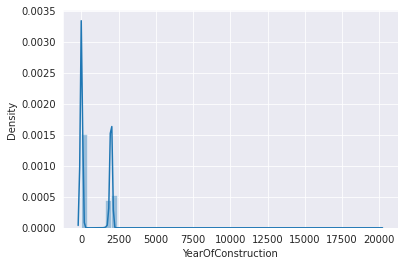

In [328]:
sns.distplot(data['YearOfConstruction'])

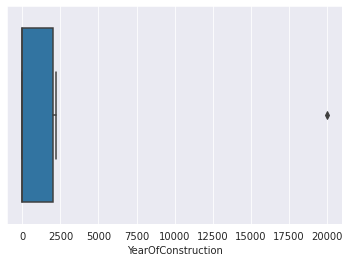

In [330]:
sns.boxplot(data['YearOfConstruction'])
plt.show()

In [331]:
data['YearOfConstruction'].describe()

count   451956.00000
mean       780.08231
std        971.60094
min          0.00000
25%          0.00000
50%          0.00000
75%       1987.00000
max      20004.00000
Name: YearOfConstruction, dtype: float64

In [ ]:
data.columns

In [ ]:
data['YearOfConstruction'].describe()

### Living Space

In [ ]:
LivingSpace = data['LivingSpace'].copy()

In [ ]:
data['LivingSpace'].head()

In [ ]:
data['LivingSpace'].dtype

In [ ]:
data['LivingSpace'].describe()

In [ ]:
data['LivingSpace'].value_counts()

In [ ]:
data['LivingSpace'] = data['LivingSpace'].replace('not available', 0)
data['LivingSpace'].value_counts()

In [ ]:
data['LivingSpace'] = data['LivingSpace'].replace(',', '', regex=True)
data['LivingSpace'].value_counts()

In [ ]:
sns.distplot(data['LivingSpace'])

In [ ]:
data['LivingSpace'] = data['LivingSpace'].apply(pd.to_numeric)

In [ ]:
sns.boxplot(data['LivingSpace'])
plt.show()

In [ ]:
data['LivingSpace'].describe()

In [ ]:
sample_outliers = detect_outliers_zscore(data['LivingSpace'])

In [ ]:
#print(sample_outliers)

In [ ]:
#data = data[data["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)

In [ ]:
data['LivingSpace'].describe()

In [ ]:
#sample_outliers = detect_outliers_zscore(data['LivingSpace'])
#print(sample_outliers)

In [ ]:
sns.boxplot(data['LivingSpace'])

In [ ]:
sns.distplot(data['LivingSpace'])

In [ ]:
data['LivingSpace'].describe()

In [ ]:
Livingspace = data['LivingSpace'].copy()

In [ ]:
Livingspace = Livingspace.apply(pd.to_numeric)
Livingspace = pd.DataFrame(Livingspace)
Livingspace.head()

In [ ]:
Livingspace['LivingSpace'].head()

In [ ]:
Livingspace.shape

In [ ]:
sample_outliers = detect_outliers_zscore(Livingspace['LivingSpace'])
#print(sample_outliers)

In [ ]:
#data = data[data["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)
Livingspace = Livingspace[Livingspace["LivingSpace"]<min(sample_outliers)].reset_index(drop = True)

In [310]:
Livingspace.shape

(134701, 1)

In [311]:
LivingSpace.shape

(451956,)

Should you fix the outliers or leave it in this scenerio???

In [ ]:
data.columns

### Coordinates

In [ ]:
data[['CoordN', 'CoordE']].head()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['CoordE'], data['CoordN'])
ax.set_xlabel('Eastern Coordinates')
ax.set_ylabel('Northern Coordinates')
plt.show()

In [ ]:
data[['CoordN', 'CoordE']].value_counts()

In [ ]:
data['CoordN'].dtype

## Final Preparation for Modelling

In [ ]:
data.columns

In [ ]:
data[['DealType', 'Deal_Type']].head()

In [ ]:
target_map = {
    10: 0,
    20: 1}

In [ ]:
data['DealType'].replace(target_map, inplace = True)
data['DealType'].head()

In [ ]:
data = data.drop('Deal_Type', axis = 1)

In [ ]:
data.columns

In [ ]:
data.shape

In [248]:
obj_col

['Canton']

In [249]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'LangDetected', 'NumRooms', 'Floor',
       'YearOfConstruction', 'LivingSpace', 'CoordE', 'CoordN', 'Description'],
      dtype='object')

In [250]:
ID = data['ID'].copy()

In [252]:
data = data.drop('ID', axis = 1)

In [298]:
drop_cols = ['AvailableDate', 'Description']

In [297]:
data.head()

,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,LangDetected,NumRooms,Floor,YearOfConstruction,LivingSpace,CoordE,CoordN,Description,PublishedYear,PublishedMonth,PublishedDay
0,0,JU,2954.00000,268126.74419,2020-12-16,not available,1050.00000,fr,3.50000,not available,0,80,7.21142,47.40130,Appartement avec beaucoup de charme à louer à ...,2020,12,16
1,0,ZH,8902.00000,91808.18182,2021-01-20,sofort,1061.00000,de,3.00000,Stock,0,57,8.43089,47.37906,Für diese Wohnung suchen wir ein nettes Paar (...,2021,1,20
2,0,TI,6830.00000,168237.07651,2020-10-16,sofort,2250.00000,it,10.00000,Stock,0,190,9.03179,45.83595,<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,2020,10,16
3,1,TI,6818.00000,745554.41230,2020-07-17,sofort,2150000.00000,it,5.50000,Stock,2012,163,8.98268,45.92414,"Attico mansardato, posto in elegante palazzina...",2020,7,17
4,0,TI,6883.00000,410524.25872,2020-05-06,sofort,880.00000,it,2.50000,Stock,1991,50,8.97972,45.84028,"Appartamento con pavimento in parquet, riscald...",2020,5,6


In [302]:
d = data.copy()

In [303]:
data = pd.get_dummies(data = data,columns = obj_col, drop_first = True)

In [299]:
data = data.drop(columns = drop_cols, axis = 1)

In [304]:
data.head()

,DealType,ZipCode,City,PublishedDate,PriceText,NumRooms,YearOfConstruction,LivingSpace,CoordE,CoordN,PublishedYear,PublishedMonth,PublishedDay,Canton_FR,Canton_JU,Canton_LU,Canton_TI,Canton_VD,Canton_ZH,Floor_Stock,Floor_basement,Floor_floor or higher,Floor_ground floor,Floor_not available,LangDetected_en,LangDetected_fr,LangDetected_it
0,0,2954.00000,268126.74419,2020-12-16,1050.00000,3.50000,0,80,7.21142,47.40130,2020,12,16,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,8902.00000,91808.18182,2021-01-20,1061.00000,3.00000,0,57,8.43089,47.37906,2021,1,20,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,6830.00000,168237.07651,2020-10-16,2250.00000,10.00000,0,190,9.03179,45.83595,2020,10,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,1,6818.00000,745554.41230,2020-07-17,2150000.00000,5.50000,2012,163,8.98268,45.92414,2020,7,17,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,6883.00000,410524.25872,2020-05-06,880.00000,2.50000,1991,50,8.97972,45.84028,2020,5,6,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [273]:
#Remember this for some visualization
#count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
#plt.show()

In [305]:
data = data.drop('PublishedDate', axis=1)

In [306]:
data.isnull().sum()

DealType                 0
ZipCode                  0
City                     0
PriceText                0
NumRooms                 0
YearOfConstruction       0
LivingSpace              0
CoordE                   0
CoordN                   0
PublishedYear            0
PublishedMonth           0
PublishedDay             0
Canton_FR                0
Canton_JU                0
Canton_LU                0
Canton_TI                0
Canton_VD                0
Canton_ZH                0
Floor_Stock              0
Floor_basement           0
Floor_floor or higher    0
Floor_ground floor       0
Floor_not available      0
LangDetected_en          0
LangDetected_fr          0
LangDetected_it          0
dtype: int64

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451956 entries, 0 to 451955
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DealType               451956 non-null  int64  
 1   ZipCode                451956 non-null  float64
 2   City                   451956 non-null  float64
 3   PriceText              451956 non-null  float64
 4   NumRooms               451956 non-null  float64
 5   YearOfConstruction     451956 non-null  int64  
 6   LivingSpace            451956 non-null  int64  
 7   CoordE                 451956 non-null  float64
 8   CoordN                 451956 non-null  float64
 9   PublishedYear          451956 non-null  int64  
 10  PublishedMonth         451956 non-null  int64  
 11  PublishedDay           451956 non-null  int64  
 12  Canton_FR              451956 non-null  uint8  
 13  Canton_JU              451956 non-null  uint8  
 14  Canton_LU              451956 non-nu

# Modelling

In [333]:
y = data['PriceText']
X = data.drop(['PriceText'], axis = 1)

In [335]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((361564, 25), (361564,), (90392, 25), (90392,))

In [336]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [318]:
#Initialize the model
lr = LinearRegression()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()
ctb = CatBoostRegressor(silent=True)
lgb = LGBMRegressor()

In [320]:
#train the model
lr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
rfr.fit(x_train, y_train)

In [337]:
xgb.fit(x_train, y_train)
ctb.fit(x_train, y_train)
lgb.fit(x_train, y_train)

LGBMRegressor()

In [338]:
lr_pred = lr.predict(x_test)
gbr_pred = gbr.predict(x_test)
rfr_pred = rfr.predict(x_test)
xgb_pred = xgb.predict(x_test)
ctb_pred = ctb.predict(x_test)
lgb_pred = lgb.predict(x_test)

In [339]:
lr_rms = np.sqrt(mean_squared_error(y_test, lr_pred))
gbr_rms = np.sqrt(mean_squared_error(y_test, gbr_pred))
rfr_rms = np.sqrt(mean_squared_error(y_test, rfr_pred))
xgb_rms = np.sqrt(mean_squared_error(y_test, xgb_pred))
ctb_rms = np.sqrt(mean_squared_error(y_test, ctb_pred))
lgb_rms = np.sqrt(mean_squared_error(y_test, lgb_pred))

In [346]:
lr_tr_score = lr.score(x_train, y_train)
gbr_tr_score = gbr.score(x_train, y_train)
rfr_tr_score = rfr.score(x_train, y_train)
xgb_tr_score = xgb.score(x_train, y_train)
ctb_tr_score = ctb.score(x_train, y_train)
lgb_tr_score = lgb.score(x_train, y_train)

In [347]:
lr_te_score = lr.score(x_test, y_test)
gbr_te_score = gbr.score(x_test, y_test)
rfr_te_score = rfr.score(x_test, y_test)
xgb_te_score = xgb.score(x_test, y_test)
ctb_te_score = ctb.score(x_test, y_test)
lgb_te_score = lgb.score(x_test, y_test)

In [ ]:
# 'Train Score': [lr_tr_score, gbr_tr_score, rfr_tr_score, xgb_tr_score, ctb_tr_score, lgb_tr_score],
# 'Test Score': [lr_te_score, gbr_te_score, rfr_te_score, xgb_te_score, ctb_te_score, lgb_te_score]

In [340]:
dict_ = {'Algorithm':['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'RMSE_Score':[lr_rms, gbr_rms, rfr_rms, xgb_rms, ctb_rms, lgb_rms]}

df = pd.DataFrame(dict_, index=[0,1,2,3,4,5])
df

,Algorithm,RMSE_Score
0,LinearRegression,259428.57505
1,GradientBoostingRegressor,181858.24217
2,RandomForestRegressor,96734.67847
3,XGBoost,128915.09970
4,CatBoost,128611.98650
5,LightGBM,143114.34210


In [348]:
dict1 = {'Algorithm':['LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'RMSE_Score':[lr_rms, gbr_rms, rfr_rms, xgb_rms, ctb_rms, lgb_rms],
        'Train Score': [lr_tr_score, gbr_tr_score, rfr_tr_score, xgb_tr_score, ctb_tr_score, lgb_tr_score],
        'Test Score': [lr_te_score, gbr_te_score, rfr_te_score, xgb_te_score, ctb_te_score, lgb_te_score]}

df = pd.DataFrame(dict1, index=[0,1,2,3,4,5])
df

,Algorithm,RMSE_Score,Train Score,Test Score
0,LinearRegression,259428.57505,0.73218,0.73195
1,GradientBoostingRegressor,181858.24217,0.86880,0.86828
2,RandomForestRegressor,96734.67847,0.99446,0.96273
3,XGBoost,128915.09970,0.94148,0.93381
4,CatBoost,128611.98650,0.94008,0.93412
5,LightGBM,143114.34210,0.92107,0.91843


In [341]:
metric = make_scorer(mean_squared_error, greater_is_better = True)

In [342]:
gbr_cv = cross_val_score(gbr, X, y, scoring = metric, cv = 5)
gbr_cv = [np.around(i, decimals=3) for i in gbr_cv]

rfr_cv = cross_val_score(rfr, X, y, scoring = metric, cv = 5)
rfr_cv = [np.around(i, decimals=3) for i in rfr_cv]

lr_cv = cross_val_score(lr, X, y, scoring = metric, cv = 5)
lr_cv = [np.around(i, decimals=3) for i in lr_cv]

ctb_cv = cross_val_score(ctb, X, y, scoring = metric, cv = 5)
ctb_cv = [np.around(i, decimals=3) for i in ctb_cv]


xgb_cv = cross_val_score(xgb, X, y, scoring = metric, cv = 5)
xgb_cv = [np.around(i, decimals=3) for i in xgb_cv]

lgb_cv = cross_val_score(lgb, X, y, scoring = metric, cv = 5)
lgb_cv = [np.around(i, decimals=3) for i in lgb_cv]

In [343]:
gbr_cv1 = np.sqrt(gbr_cv)
rfr_cv1 = np.sqrt(rfr_cv)
lr_cv1 = np.sqrt(lr_cv)
xgb_cv1 = np.sqrt(xgb_cv)
ctb_cv1 = np.sqrt(ctb_cv)
lgb_cv1 = np.sqrt(lgb_cv)

In [344]:
gbr_cv1 = [np.around(i, decimals=3) for i in gbr_cv1]
rfr_cv1 = [np.around(i, decimals=3) for i in rfr_cv1]
lr_cv1 = [np.around(i, decimals=3) for i in lr_cv1]
xgb_cv1 = [np.around(i, decimals=3) for i in xgb_cv1]
ctb_cv1 = [np.around(i, decimals=3) for i in ctb_cv1]
lgb_cv1 = [np.around(i, decimals=3) for i in lgb_cv1]

In [345]:
dict_ = {'Algorithm': ['GradientBoostingRegressor', 'RandomForestRegressor', 'LogisticRegression', 'XGBoost', 'CatBoost', 'LightGBM'], 
         'cv_score':[gbr_cv1, rfr_cv1, lr_cv1, xgb_cv1, ctb_cv1, lgb_cv1], 
         'cv_mean':[np.mean(gbr_cv1), np.mean(rfr_cv1), np.mean(lr_cv1), np.mean(xgb_cv1), np.mean(ctb_cv1), np.mean(lgb_cv1)], 
         'cv_std':[np.std(gbr_cv1), np.std(rfr_cv1), np.std(lr_cv1), np.std(xgb_cv1), np.std(ctb_cv1), np.std(lgb_cv1)]
        }
df = pd.DataFrame(dict_, index = [0,1,2,3,4,5])
df

,Algorithm,cv_score,cv_mean,cv_std
0,GradientBoostingRegressor,"[178792.659, 169808.224, 175143.485, 186811.34...",183077.03340,12202.22368
1,RandomForestRegressor,"[116725.803, 98861.639, 108090.966, 97141.648,...",110573.01500,12826.70862
2,LogisticRegression,"[255271.59, 307100.069, 247308.629, 267063.078...",273066.52460,21979.11563
3,XGBoost,"[139383.553, 125986.39, 131371.707, 128448.25,...",135269.78040,9135.64534
4,CatBoost,"[137178.546, 124138.25, 130786.702, 127373.558...",133958.11220,9248.93462
5,LightGBM,"[148849.387, 137826.114, 142738.441, 143873.43...",147232.26160,8570.04687


In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)